# <font color="darkred"> [Possible] Factors for the Recent Surge of Fake Accounts  </font>
Matthew Romero  
matmat.romero@gmail.com



# Introduction
In the morning of June 07, 2020, Facebook users woke up to find fake profiles resembling themselves. Some of whom had little to no friends in it, while some fake profiles imitated the personalities of the real profiles they copied. The reality was that everyone could've been a victim. People were clueless as to how this happened. This very simple and minute study sought to determine the correlation between some common political behaviors that led to these individuals to become a victim of these fake profiles. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.stats import chi2_contingency 

pass

The responses to this study was gathered using Microsoft Forms. [(The questionnaire can be found here)](https://forms.office.com/Pages/ResponsePage.aspx?id=Zz3KImWBbke5GEsuMeBHup_9C11ArKVNu6u3wzXcwPxURjFVUjBMVzc3WTlYMTVEQkhESFNBRUYwUi4u) Afterwards, the responses were saved in a csv file to be processed here.

**Assumption**: Responses were collected anonmyously and each user were not limited to one answer only. There is no way of knowing if a certain user had multiple answers to this questionnaire. This could decrease the reliability of this test.


The following questions were asked to the respondents:
- Did you sign the junk terror bill online petition?
- Did you post something with the hashtag #JunkTerrorBill?
- Are/Were you a part of the Big 4 trashtalkan Facebook group?
- Are you a victim of the recent rise of fake accounts on Facebook?

The first 3 statements refer to the possible factor that led to the fake profile creation, and the latter was asked to check if they were a victim or not.

In [2]:
df = pd.read_csv('trolls.csv', 
                 usecols=[5,6,7,8]).dropna().reset_index(drop=True)
df.head()

,Did you sign the junk terror bill online petition?,Did you post something with the hashtag #JunkTerrorBill?,Are/Were you a part of the Big 4 trashtalkan Facebook group?,Are you a victim of the recent rise of fake accounts on Facebook?
0,No,Yes,No,No
1,No,No,Yes,Yes
2,Yes,Yes,Yes,Yes
3,No,No,No,No
4,No,Yes,Yes,No


The column headers of the dataset were renamed for easier processing.

In [3]:
df.columns = ['sign_petition', 'post_terrorbill', 'part_bigfour', 'victim']
df.head()

,sign_petition,post_terrorbill,part_bigfour,victim
0,No,Yes,No,No
1,No,No,Yes,Yes
2,Yes,Yes,Yes,Yes
3,No,No,No,No
4,No,Yes,Yes,No


Using the `df.shape` method, the number of samples could be counted.

In [4]:
df.shape

(136, 4)

There are `136` samples in this data set.  

# Chi-Square Test

In dealing with categorical data, the Chi-Square is used to test the correlation between the independent categorical features of a dataset to the outcome. In this case, we're testing if the 3 features `sign_petition`, `post_terrorbill`, `part_bigfour` had a hand in determining if one is a `victim`. 

Before analyzing the dataset via Chi-Square Test, the samples were counted per feature:

In [5]:
df1 = df.apply(pd.value_counts)
df1

,sign_petition,post_terrorbill,part_bigfour,victim
No,84,72,70,69
Yes,52,64,66,67


The dataset then was analyzed using the chi-square distribution of Scipy which is `chi2_contingency`.

In [6]:
chi2_contingency(df1)

(4.288013069226056,
 0.23199650691088683,
 3,
 array([[73.75, 73.75, 73.75, 73.75],
        [62.25, 62.25, 62.25, 62.25]]))

We see a high p-value at 0.2319. This tells us that the features don't dictate who becomes a victim.

This is also shown here below.

In [7]:
chi2, p, dof, ex = chi2_contingency(df1, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

Chi2 result of the contingency table: 4.288013069226056, p-value: 0.23199650691088683


We can actually make the conclusion that it doesn't matter what you did on Facebook; whether you signed the petition against the anti-terrorism bill, posted something against the anti-terrorism bill with the hashtag #JunkTerrorBill, or if you joined the Big 4 Trashtalkan Fb group, anyone could've been a victim. 

# kNN Classifier

Even though the correlations are weak, let's try to extend this further by determining which of these activities led to the individuals being victimized via machine learning. For this data set, we will be using the k-Nearest Neighbors Classifier.

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

- In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor

- In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.[[src]](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)  

<img src="knn_sample.jpg">

In simple terms, the kNN Classifier Machine Learning algorithm checks if your data falls within a given pattern. A most popular example of this is when you program an app that detects whether the picture is a dog or a cat. You must first feed your app with lots of pictures of dog then label the pictures as `dog`, and do the same thing with cats and label them as `cat`. The app detects features such as face_structure, fur_length, nose_length, and other features when determining if the picture you will show is a cat or a dog.

In this, what will be determined is if activities done in any of the three features `sign_petition`, `post_terrorbill`, `part_bigfour` will make someone become a `victim` of having a fake account. The algorithm can predict this for us.

A bit of data cleaning was done for better processing later on. The dataframe was renamed to `df_trolls` and the values were replaced with `1` and `0`, corresponding to `Yes` and `No` respectively.

In [8]:
df_TROLLS = df

In [9]:
df_TROLLS = df_TROLLS.replace(['Yes', 'No'], [1,0])

In [10]:
df_TROLLS.head()

,sign_petition,post_terrorbill,part_bigfour,victim
0,0,1,0,0
1,0,0,1,1
2,1,1,1,1
3,0,0,0,0
4,0,1,1,0


For the k-Nearest Neighbors algorithm to work, the first three features must be separated to the target [`victim`]. A variable was created to store the three features, for easier usage later on.

In [11]:
dummy = df_TROLLS

In [12]:
df_features = dummy.drop('victim', axis=1)
df_features.head()

,sign_petition,post_terrorbill,part_bigfour
0,0,1,0
1,0,0,1
2,1,1,1
3,0,0,0
4,0,1,1


Before running the kNN algorithm, we can immediately check the accuracy of our model and evaluate if this is usable or not. The code below separates the dataset into the training and test sets, and measures their accuracy when a certain `k` value is used.

Highest possible accuracy for training set: 0.6323529411764706
Highest possible accuracy for test set: 0.6029411764705882


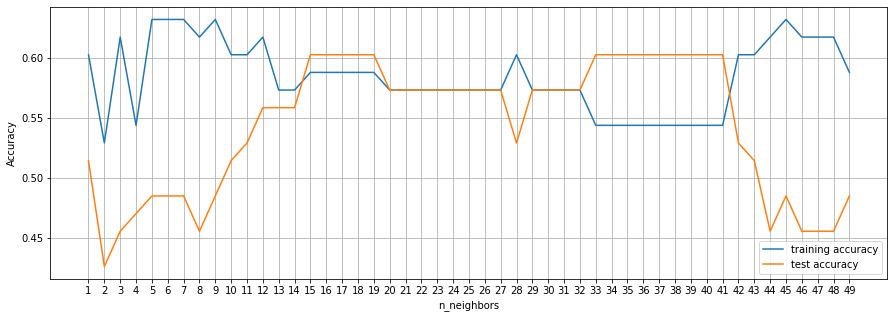

In [208]:
X_train, X_test, y_train, y_test = train_test_split(df_features,df_TROLLS['victim'], 
                                                    test_size=0.50,random_state=6)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 50) # try n_neighbors from 1 to 50

for n_neighbors in neighbors_settings:   
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy

plt.figure(figsize=(15,5))
plt.xticks(np.arange(1,50))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.grid()
print("Highest possible accuracy for training set: {}".format(max(training_accuracy)))
print("Highest possible accuracy for test set: {}".format(max(test_accuracy)))
pass

The training set had a 63.23% accuracy rate and the highest accuracy the test set can achieve is 60%. Not so promising, yet let's try to run it with kNN.  

The codes below will implement the kNN Machine Learning algorithm.   

In [14]:
df_TROLLS.head()

,sign_petition,post_terrorbill,part_bigfour,victim
0,0,1,0,0
1,0,0,1,1
2,1,1,1,1
3,0,0,0,0
4,0,1,1,0


In [15]:
a = df_TROLLS['victim'].to_numpy()
b = df_TROLLS[['sign_petition', 'post_terrorbill', 'part_bigfour']].to_numpy()

In [78]:
data = {
    'target': (a),
    'data': (b),
    'feature_names':['sign_petition', 'post_terrorbill', 'part_bigfour'],
    'target_names':np.asarray(('No', 'Yes'))
}
c = data

In [209]:
X_train, X_test, y_train, y_test = train_test_split(
    c['data'], c['target'],test_size=0.5, 
    random_state=6)

In [210]:
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(y_train.shape))

X_train shape: (68, 3)
Y_train shape: (68,)


In [211]:
print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(y_test.shape))

X_test shape: (68, 3)
Y_test shape: (68,)


In [221]:
knn = KNeighborsClassifier(n_neighbors=41)

In [222]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=41, p=2,
                     weights='uniform')

## Test cases for the model

The following codes predict if the features contribute to the target `victim`. From here you will see an array of values like `np.array([[0,0,0]])`. These numbers refer to the `feature_names` `['sign_petition', 'post_terrorbill', 'part_bigfour']`.

See the comments on the following test cases below and observe the behavior of the model.

In [223]:
data['feature_names']

['sign_petition', 'post_terrorbill', 'part_bigfour']

In [224]:
# Individual did not sign the petition, did not post #JunkTerrorBil, is not in Big 4 trashtalk group
X_new = np.array([[0,0,0]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Victim? {}".format(
       c['target_names'][prediction]))

Prediction: [0]
Victim? ['No']


In [225]:
# Individual signed the petition, posted #JunkTerrorBil, is in Big 4 trashtalk group
X_new = np.array([[1,1,1]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Victim? {}".format(
       c['target_names'][prediction]))

Prediction: [1]
Victim? ['Yes']


In [264]:
# Individual signed the petition, did not post #JunkTerrorBil, is not in Big 4 trashtalk group
X_new = np.array([[1,0,0]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Victim? {}".format(
       c['target_names'][prediction]))

Prediction: [0]
Victim? ['No']


In [267]:
# Individual signed the petition, did not post #JunkTerrorBil, is in Big 4 trashtalk group
X_new = np.array([[1,0,1]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Victim? {}".format(
       c['target_names'][prediction]))

Prediction: [1]
Victim? ['Yes']


In [227]:
# Individual did not sign the petition, posted #JunkTerrorBil, is in Big 4 trashtalk group
X_new = np.array([[0,1,1]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Victim? {}".format(
       c['target_names'][prediction]))

Prediction: [1]
Victim? ['Yes']


In [265]:
# Individual signed the petition, posted #JunkTerrorBil, is not Big 4 trashtalk group
X_new = np.array([[1,1,0]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Victim? {}".format(
       c['target_names'][prediction]))

Prediction: [1]
Victim? ['Yes']


In [229]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.60


----

The codes that follow are just some evaluations to compare predictions between the training set and the test sets, and how close they are.

Now testing the `test_set` and comparing it with our original test set.

In [132]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(np.array(y_pred).tolist()))

print("Original predictions:\n {}".format(np.array(y_test).tolist()))

Test set predictions:
 [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]
Original predictions:
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]


In [263]:
# clf = KNeighborsClassifier(); 
# y = c['target'] # number_features = c['data'].shape[1] 
# print(c['feature_names']) # print('Feature Accuracy') 
# for i in range(number_features): 
#     X = c['data'][:, i].reshape(-1, 1);
#     scores = cross_val_score(clf, X, y) 
#     print('%d %g' % (i, scores.mean()));
    
# pass; 


In [262]:
print('Feature Accuracy')
for i in range(number_features): 
    X_head = np.atleast_2d(c['data'][:, 0:i]) 
    X_tail = np.atleast_2d(c['data'][:, i+1:]) 
    X = np.hstack((X_head, X_tail)) 
    scores = cross_val_score(clf, X, y) 
    print('%d %g' % (i, scores.mean()))


Feature Accuracy
0 0.507407
1 0.551691
2 0.529469


C:\Users\Matthew Romero\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Matthew Romero\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Matthew Romero\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# Conclusion

At around 60 percent accuracy rate, this test is near non-indicative whether the three features correlate to you being a target **BUT** take note of the following things:
- Whether you signed the petition against the terror bill, posted something with the hashtag #JunkTerrorBill, or you are part of the Big4 Trashtalkan group, you are a possible victim.
- Based on this model, you're most likely a victim if you did 2 of the 3 factors mentioned in this study.
- The first factor `sign_petition` contributed the most to the accuracy of this study. 

Nonetheless, please keep your accounts safe. Check your profiles. Lock your timelines. At this point, anyone **is** a victim. 

For information about keeping your profiles safe, please click [here](https://www.wired.com/story/facebook-privacy-apps-ads-friends-delete-account/).